INFOMHNA Lab Assignment 1

Christian Acosta - 6369251

In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
(x_train.shape)

(60000, 28, 28)

Exercise one: Identifying handwritten numbers

Fully-connected neural networks

In [4]:
x_train_rs = x_train.reshape(60000, 784)
#np.reshape(x_train, len(x_train*28*28))

In [5]:
x_test_rs = x_test.reshape(10000, 784)

In [6]:
x_train_rs.shape
x_test_rs.shape

(10000, 784)

In [7]:
x_train_rs = x_train_rs/255

In [8]:
x_test_rs = x_test_rs/255

In [27]:
for i in x_train_rs:
    res=i/255
    x_train_rs[i]=res

In [28]:
for i in x_test_rs:
    res=i/255
    x_test_rs[i]=res

In [9]:
y_train_labels = keras.utils.to_categorical(y_train, 10)

In [10]:
y_test_labels = keras.utils.to_categorical(y_test, 10)

In [11]:
model = keras.Sequential()
model.add(keras.layers.Dense(256, input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [14]:
history = model.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 4ms/step - loss: 0.4026 - accuracy: 0.8845 - val_loss: 0.3108 - val_accuracy: 0.9136
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.3091 - accuracy: 0.9131 - val_loss: 0.2923 - val_accuracy: 0.9200
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2968 - accuracy: 0.9168 - val_loss: 0.2794 - val_accuracy: 0.9243
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2884 - accuracy: 0.9186 - val_loss: 0.2727 - val_accuracy: 0.9266
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2829 - accuracy: 0.9207 - val_loss: 0.2853 - val_accuracy: 0.9219
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2794 - accuracy: 0.9220 - val_loss: 0.2883 - val_accuracy: 0.9245
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.2751 - accuracy: 0.9222 - val_loss: 0.2720 - val_accuracy: 0.9255
Epoch 

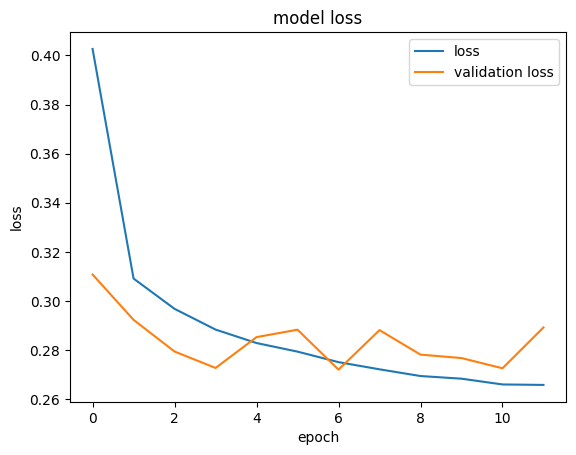

In [15]:
#Loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

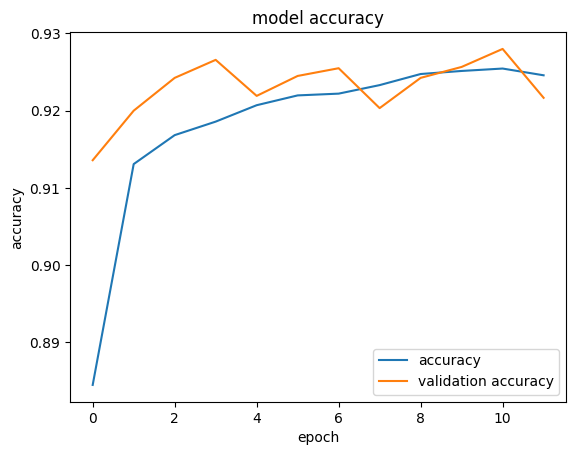

In [16]:
#Accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [17]:
loss, accuracy = model.evaluate(x_test_rs, y_test_labels, verbose=0)

In [18]:
print(loss, accuracy)

0.3020648956298828 0.9150000214576721


Addition of RELU activation function

In [19]:
model_relu = keras.Sequential()
model_relu.add(keras.layers.Dense(256, input_shape=(784,), activation = 'relu'))
model_relu.add(keras.layers.Dense(10, activation='softmax'))

In [20]:
model_relu.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               200960    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_relu.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.RMSprop(), metrics='accuracy')

In [22]:
history_relu = model_relu.fit(x_train_rs, y_train_labels, batch_size=128, 
epochs=12, verbose=1, validation_split=0.2)

Epoch 1/12
375/375 [==============================] - 2s 4ms/step - loss: 0.3294 - accuracy: 0.9087 - val_loss: 0.1860 - val_accuracy: 0.9473
Epoch 2/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1508 - accuracy: 0.9558 - val_loss: 0.1282 - val_accuracy: 0.9628
Epoch 3/12
375/375 [==============================] - 1s 3ms/step - loss: 0.1029 - accuracy: 0.9700 - val_loss: 0.1004 - val_accuracy: 0.9697
Epoch 4/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0757 - accuracy: 0.9776 - val_loss: 0.0951 - val_accuracy: 0.9731
Epoch 5/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0588 - accuracy: 0.9835 - val_loss: 0.0818 - val_accuracy: 0.9763
Epoch 6/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0466 - accuracy: 0.9868 - val_loss: 0.0770 - val_accuracy: 0.9774
Epoch 7/12
375/375 [==============================] - 1s 3ms/step - loss: 0.0373 - accuracy: 0.9889 - val_loss: 0.0780 - val_accuracy: 0.9778
Epoch 

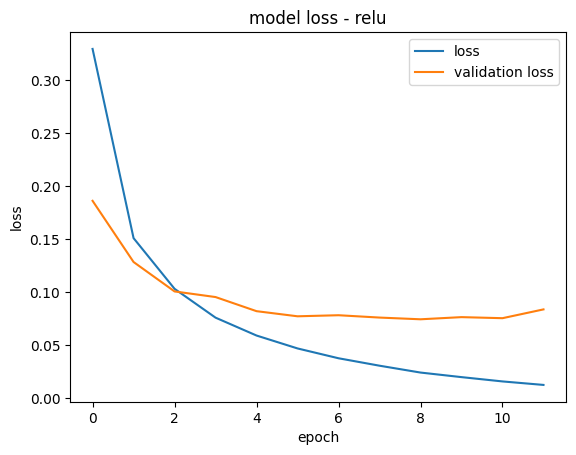

In [23]:
#Loss graph
plt.plot(history_relu.history['loss'])
plt.plot(history_relu.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

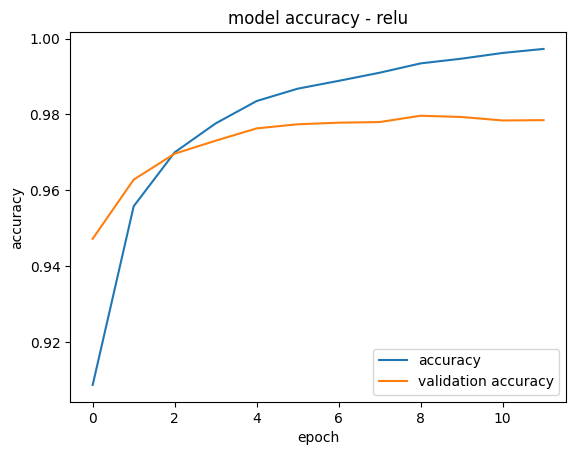

In [24]:
#Accuracy graph
plt.plot(history_relu.history['accuracy'])
plt.plot(history_relu.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [25]:
loss_relu, accuracy_relu = model_relu.evaluate(x_test_rs, y_test_labels, verbose=0)

In [26]:
print(loss_relu, accuracy_relu)

0.07318475097417831 0.9797000288963318


Deep convolutional neural networks

In [27]:
x_train_deep = x_train.reshape(60000, 28, 28, 1)

In [28]:
x_test_deep = x_test.reshape(10000, 28, 28, 1)

In [93]:
x_train_deep.shape()

TypeError: 'tuple' object is not callable

In [29]:
x_train_deep = x_train_deep/255

In [30]:
x_test_deep = x_test_deep/255

In [31]:
model_dnn = keras.Sequential()
model_dnn.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn.add(keras.layers.Flatten())
model_dnn.add(keras.layers.Dense(128, activation="relu"))
model_dnn.add(keras.layers.Dense(10, activation="softmax"))
model_dnn.compile(loss='categorical_crossentropy')


In [32]:
model_dnn.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [33]:
history_dnn = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 42s 111ms/step - loss: 0.2249 - accuracy: 0.9315 - val_loss: 0.0667 - val_accuracy: 0.9793
Epoch 2/6
375/375 [==============================] - 43s 115ms/step - loss: 0.0528 - accuracy: 0.9837 - val_loss: 0.0473 - val_accuracy: 0.9857
Epoch 3/6
375/375 [==============================] - 40s 107ms/step - loss: 0.0329 - accuracy: 0.9899 - val_loss: 0.0428 - val_accuracy: 0.9865
Epoch 4/6
375/375 [==============================] - 41s 109ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0464 - val_accuracy: 0.9863
Epoch 5/6
375/375 [==============================] - 42s 111ms/step - loss: 0.0142 - accuracy: 0.9955 - val_loss: 0.0437 - val_accuracy: 0.9877
Epoch 6/6
375/375 [==============================] - 3644s 10s/step - loss: 0.0100 - accuracy: 0.9968 - val_loss: 0.0462 - val_accuracy: 0.9885


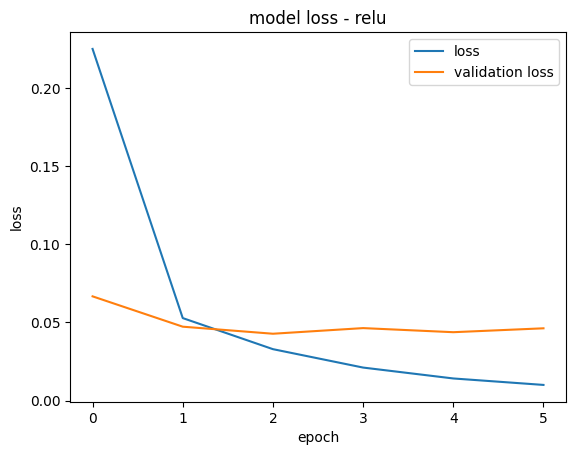

In [34]:
#Loss graph
plt.plot(history_dnn.history['loss'])
plt.plot(history_dnn.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

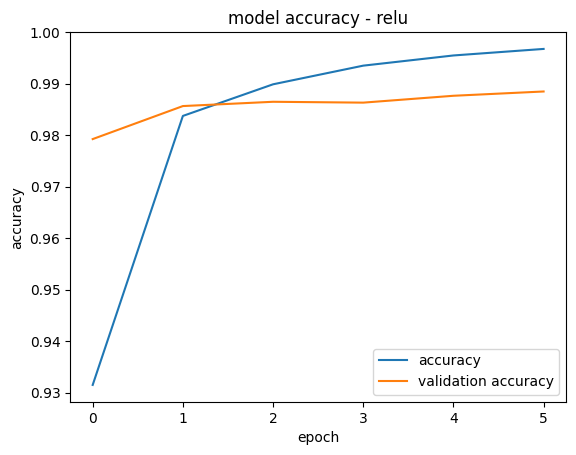

In [35]:
#Accuracy graph
plt.plot(history_dnn.history['accuracy'])
plt.plot(history_dnn.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [36]:
loss_dnn, accuracy_dnn = model_dnn.evaluate(x_test_deep, y_test_labels, verbose=0)

In [37]:
print(loss_dnn, accuracy_dnn)

0.030152495950460434 0.9911999702453613


Dropout layers

In [38]:
model_dnn_dropout = keras.Sequential()
model_dnn_dropout.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), 
activation="relu", input_shape=(28, 28, 1)))
model_dnn_dropout.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), 
activation="relu"))
model_dnn_dropout.add(keras.layers.MaxPool2D(pool_size=(2, 2)))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.25))
model_dnn_dropout.add(keras.layers.Flatten())
model_dnn_dropout.add(keras.layers.Dense(128, activation="relu"))
model_dnn_dropout.add(keras.layers.Dense(10, activation="softmax"))
model_dnn_dropout.add(keras.layers.Dropout(rate=0.50))
model_dnn_dropout.compile(loss='categorical_crossentropy')


In [39]:
model_dnn_dropout.compile(loss='categorical_crossentropy', 
optimizer=keras.optimizers.Adadelta(learning_rate=1), 
metrics='accuracy')

In [40]:
history_dnn_dropout = model_dnn.fit(x_train_deep, y_train_labels, batch_size=128, 
epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
375/375 [==============================] - 40s 107ms/step - loss: 0.0069 - accuracy: 0.9982 - val_loss: 0.0549 - val_accuracy: 0.9873
Epoch 2/6
375/375 [==============================] - 41s 110ms/step - loss: 0.0041 - accuracy: 0.9989 - val_loss: 0.0469 - val_accuracy: 0.9889
Epoch 3/6
375/375 [==============================] - 42s 111ms/step - loss: 0.0027 - accuracy: 0.9993 - val_loss: 0.0523 - val_accuracy: 0.9885
Epoch 4/6
375/375 [==============================] - 42s 111ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 0.0558 - val_accuracy: 0.9885
Epoch 5/6
375/375 [==============================] - 42s 112ms/step - loss: 8.9639e-04 - accuracy: 0.9998 - val_loss: 0.0522 - val_accuracy: 0.9896
Epoch 6/6
375/375 [==============================] - 42s 112ms/step - loss: 4.7971e-04 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 0.9893


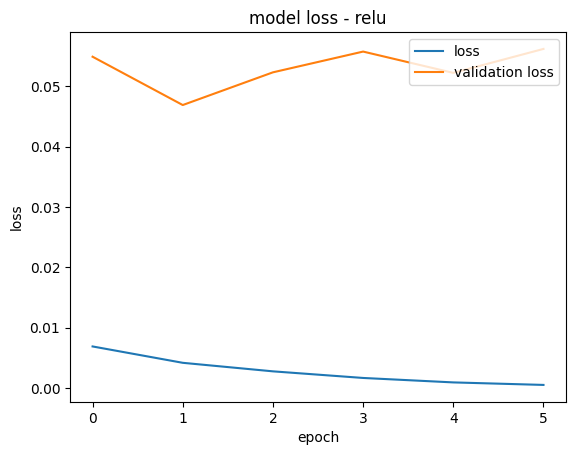

In [41]:
#Loss graph
plt.plot(history_dnn_dropout.history['loss'])
plt.plot(history_dnn_dropout.history['val_loss'])
plt.title('model loss - relu')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'validation loss'], loc='upper right')
plt.show()

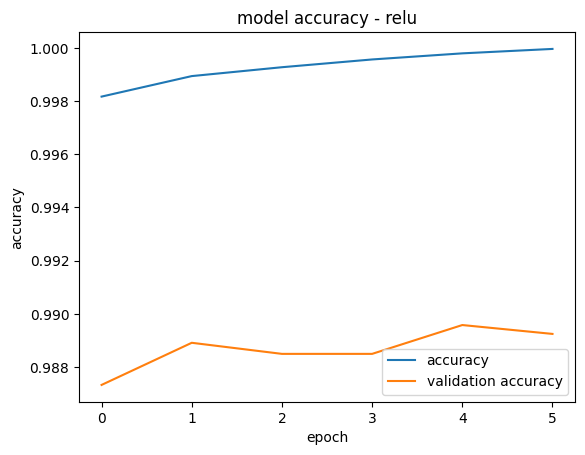

In [42]:
#Accuracy graph
plt.plot(history_dnn_dropout.history['accuracy'])
plt.plot(history_dnn_dropout.history['val_accuracy'])
plt.title('model accuracy - relu')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'validation accuracy'], loc='lower right')
plt.show()

In [43]:
loss_dnn_dropout, accuracy_dnn_dropout = model_dnn_dropout.evaluate(x_test_deep, y_test_labels, verbose=0)

In [44]:
#Check results --> don't seem to make sense
#generalizability seems to be very bad compared to no dropout model 
print(loss_dnn_dropout, accuracy_dnn_dropout)

2.311300754547119 0.07840000092983246


Exercise two: Identifying objects from images

In [45]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 6s 0us/step
